<a href="https://colab.research.google.com/github/skerryvore/regression_analysis_101/blob/master/notebooks/pyrenees_harker_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Harker Plots**

The python code in tnhis notebook demonstrates how to read in data from an Excel *.csv file, and plot Harker style plots in different ways. 

To run the code in each cell, click the **Run Cell** icon (small white arrow in black circle, top left of cell) that appears when the cell is slected (click mouse cursor inside the code cell to select it). Or to just run all cells and create all plots ij a oner, select **Run all** option from the **Runtime** menu in Colab.

Read in the Roberts et al. data file from Github, and print the first 5 rows to the screen. Change the number in majors.head(5) statement to something else to print more rows.

In [95]:
%matplotlib inline

# import the python packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read csv files via link to Github files online (needs internet).
# This can be changed to read files from local hard drive easily.
majors = pd.read_csv('https://raw.githubusercontent.com/skerryvore/regression_analysis_101/master/data/roberts_etal_pyrenees_majors.csv')

# create a python list of all the column names (useful for various things)
oxides = ['SiO2','TiO2','Al2O3','FeO*','MnO','MgO','CaO','Na2O','K2O','P2O5']

# make sure the numerical data are converted to numbers, and not as text strings
for oxide in oxides:
  majors[oxide] = majors[oxide].astype(float)

# Set the index to use sample name
majors.set_index(['Sample'],inplace=True)

# print out the first n rows of the data (change the number to specify how many rows)
majors.head(5)

,Rock type,SiO2,TiO2,Al2O3,FeO*,MnO,MgO,CaO,Na2O,K2O,P2O5
Sample,,,,,,,,,,,
QH29,Bt tonalite,62.74,0.75,17.47,4.25,0.18,1.91,6.40,4.50,1.61,0.18
QH56,foliated Hbl–Bt granodiorite,60.50,0.75,17.31,6.46,0.20,3.25,5.89,3.35,2.14,0.15
QH70,Bt tonalite,60.32,0.66,17.36,5.16,0.22,2.10,7.30,5.05,1.56,0.27
QH76,Hbl–Bt granodiorite,64.79,0.64,16.87,4.49,0.21,1.72,4.80,3.79,2.53,0.15
QH107,Bt tonalite,68.20,0.45,16.48,2.98,0.18,1.16,3.89,3.79,2.69,0.18


Plot a single Harker plot. To change the oxides in the plot just edit the column names in the ax.scatter() statement to use different oxides. In this example SiO2 is plooted on the x-axis versus TiO2.

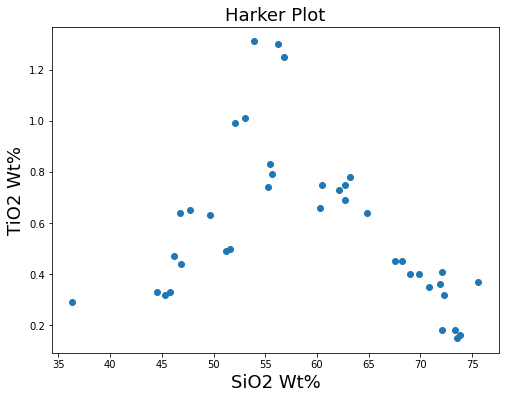

In [98]:
# Plot harker plot for selected oxide

# This statement creates a figure object, and an axes object
fig, ax = plt.subplots(1,1,figsize=(8,6))

# This statement draws the plot in the axes object
ax.scatter(majors['SiO2'].values, majors['TiO2'].values)

# Set some items for the axes
ax.set_xlabel('SiO2 Wt%',fontsize=18)
ax.set_ylabel('TiO2 Wt%',fontsize=18)
ax.set_title('Harker Plot',fontsize=18)

# Uncoment this line if you want to save the figure to a file
#plt.savefig('harker_plot.pdf',format='pdf')

# Show the plot on the screen
fig.show()

In the next plot we use the handy groupby method in the pandas dataframe, to group the data by the rock type listed in the column for Rock type.

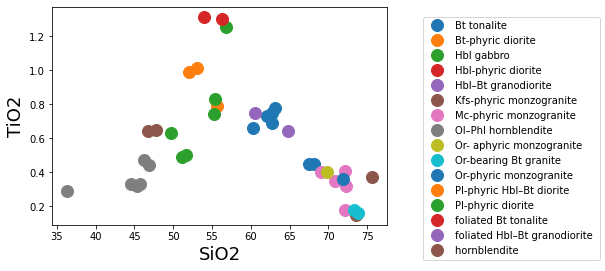

In [96]:
groups = majors.groupby('Rock type')

# Plot harker plot in groups by rock type
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.SiO2, group.TiO2, marker='o', linestyle='', ms=12, label=name)

ax.set_ylabel('TiO2',fontsize=18)
ax.set_xlabel('SiO2',fontsize=18)

fig.legend(bbox_to_anchor=(1.4, 0.9))

plt.show()

In the next code cell below, we plot a number of Harker plots on one diagram. You can edit the list of oxides to plot by adding or deleting oxides from the **selection** list. The code will count the number of oxides selected and plot a Harker plot for each, and label it correctly. You can also change the reference oxide if you wish (here it is set to be SiO2).

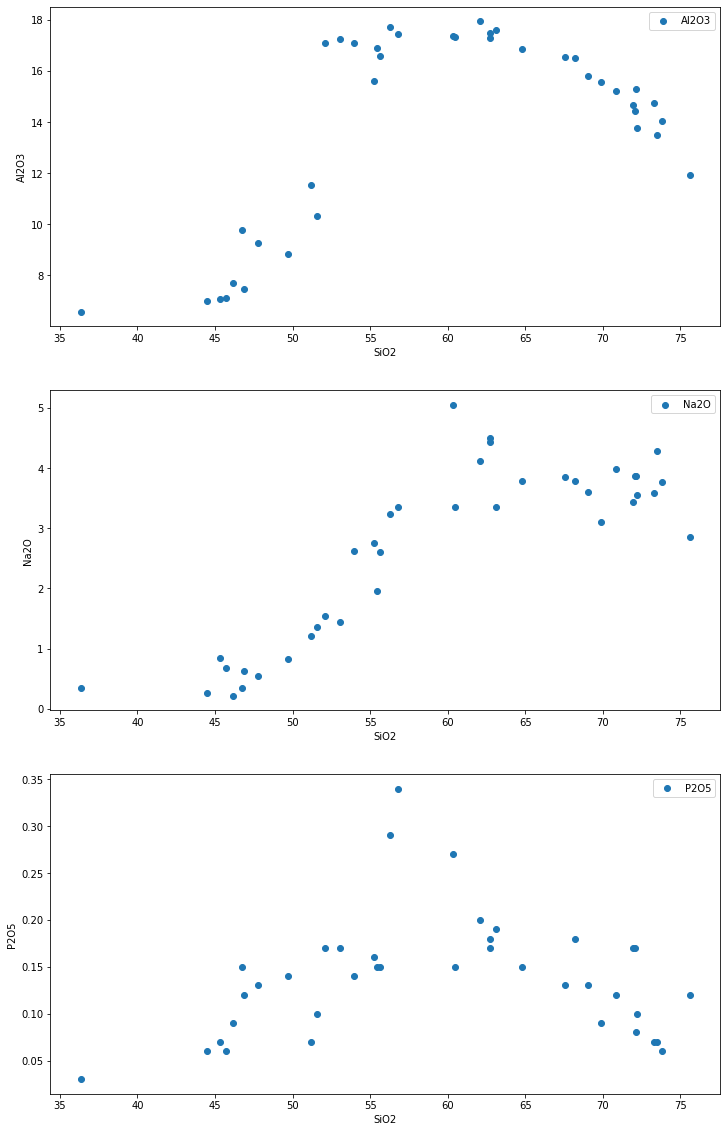

In [69]:
selection = ['Al2O3','Na2O','P2O5']

# Plot harker plots for selection of oxides
fig, ax = plt.subplots(len(selection),1,figsize=(12,20))

for i, oxide in enumerate(selection):
   ax[i].scatter(majors['SiO2'].values, majors[oxide].values, label=oxide)
   ax[i].legend(loc='upper right')
   ax[i].set_ylabel(oxide)
   ax[i].set_xlabel('SiO2')

fig.show()

In the final code cell below, we layout an array of plots in a grid format, and plot and label all the graphs appropriately.

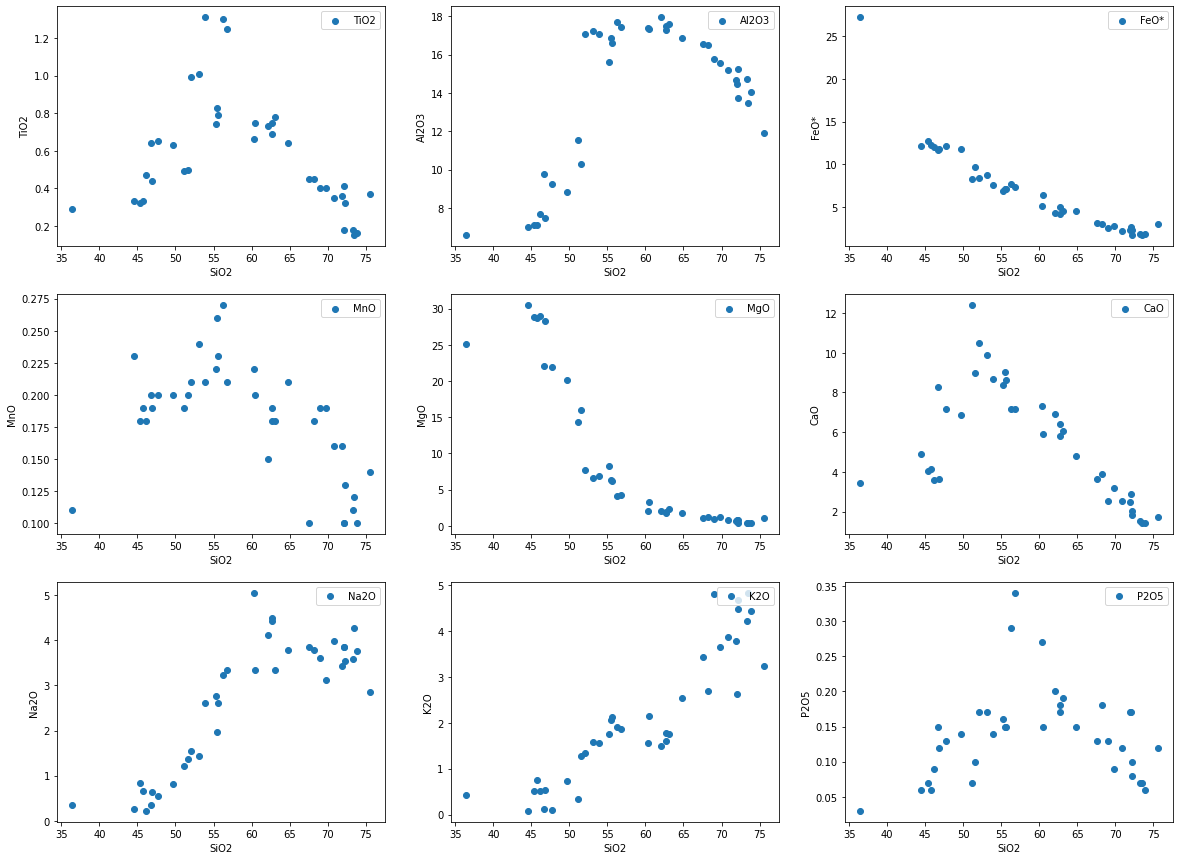

In [67]:

selection = ['TiO2','Al2O3','FeO*','MnO','MgO','CaO','Na2O','K2O','P2O5']

# Plot harker plots for selection of oxides
fig, ax = plt.subplots(3,3,figsize=(20,15))

rows = [0,0,0,1,1,1,2,2,2]
cols = [0,1,2,0,1,2,0,1,2]

for row, col, oxide in (zip(rows,cols,selection)):
   ax[row,col].scatter(majors['SiO2'].values, majors[oxide].values, label=oxide)
   ax[row,col].legend(loc='upper right')
   ax[row,col].set_ylabel(oxide)
   ax[row,col].set_xlabel('SiO2')

fig.show()